In [1]:
import pandas as pd
import numpy as np
import pickle

import math
from datetime import datetime
pd.set_option('display.max_columns', None) 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set font file path
from matplotlib.font_manager import FontProperties
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=12)


In [3]:
from collections import Counter
from itertools import chain
from scipy.optimize import curve_fit
import powerlaw

In [ ]:
from rapidfuzz import process, fuzz
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('/data/huggingface/hub/sentence-transformers_all-MiniLM-L6-v2')

import oracledb
connection = oracledb.connect(user="", password="", host="",port=,service_name="")

import oracledb
from sqlalchemy import create_engine
import cx_Oracle
from tqdm import tqdm

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

from powerlaw import Fit, plot_pdf

from tqdm import tqdm
import re
import os

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve,precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# 下载NLTK的punkt数据
# nltk.download('punkt')
stemmer = PorterStemmer()

def get_dict(x,dictionary):
    return [dictionary[str(item)] for item in x]
def get_larger(x,number):
    return [item for item in x if item>number]
def compare_larger(x,number):
    return any([item>number for item in x])
def convert_date(x):
    try:
        date=pd.Timestamp(x)
    except:
        date=pd.Timestamp(x.split('-')[0]+'-01-01')
    return date
from aquarel import load_theme
theme = load_theme("arctic_light") #调用aquarel中的'arctic_dark',"arctic_light"


In [7]:
df_match_result_with_address=pd.read_pickle('data/version/version_v2/Paper_Patent_Pair_v2.pickle')
df_match_result_with_address

,person_id,author_id,author_name,afid,affiliation_city,affiliation_country,affilname,psn_name,person_address
1,5762813,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,"ROBINS, H. IAN",Madison
2,37692963,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,"ROBINS, H., IAN",None
3,5432419,7101821912,"Ash, Stephen R.",113166379,Lafayette,United States,"Greater Lafayette Health Services, Inc.","ASH, STEPHEN R.",Lafayette
4,71519745,35248974600,"Saito, Hajime",60027841,Akita,Japan,Akita University,SAITO HAJIME,None
5,32196003,7003592507,"Mitobe, Kazutaka",60027841,Akita,Japan,Akita University,MITOBE KAZUTAKA,None
...,...,...,...,...,...,...,...,...,...
146565,12621324,7005818600,"Grifo, Jamie A.",60021784,New York,United States,New York University,"GRIFO, JAMIE",None
146566,29246630,7006373192,"Leese, H. J.",60016418,York,United Kingdom,University of York,"LEESE, HENRY, J.",None
146567,369337,7006373192,"Leese, H. J.",60016418,York,United Kingdom,University of York,"LEESE, HENRY, J.","Department of Biology University of York,York ..."
146568,29246631,7005625766,"Houghton, F. D.",60025225,Southampton,United Kingdom,University of Southampton,"HOUGHTON, FRANCHESCA, D.",None


In [8]:
# df_scopus = pd.read_sql(sql='SELECT t."eid", t."doi", t."title", t."coverDate", t."afid", t."affilname",\
#         t."affiliation_city", t."affiliation_country", t."author_count",\
#         t."author_names", t."author_ids", t."author_afids",  t."citedby_count",\
#         t."openaccess", t."freetoread", t."freetoreadLabel", t."fund_acr", t."fund_no",\
#         t."fund_sponsor" FROM "biotechnology_paper_basic_info" t', con=connection)
df_scopus=pd.read_pickle('data/biotechnology_paper_basic_info.pickle')
df_scopus['coverDate']=df_scopus['coverDate'].apply(lambda x:convert_date(x))
df_scopus['citedby_count']=df_scopus['citedby_count'].astype(int)
df_scopus

,eid,doi,title,coverDate,afid,affilname,affiliation_city,affiliation_country,author_count,author_names,author_ids,author_afids,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-84991318817,10.1007/s13205-015-0303-8,Screening and structure-based modeling of T-ce...,2015-12-01,60097662;60094550;60009689,"JH Government Post Graduate College, Betul;Man...",Betul;Aligarh;Gwalior,India;India;India,2.0,"Kamthania, Mohit;Sharma, D. K.",55479937900;57206773481,60094550-60009689;60097662,16,1,repositoryvor,Green,None,undefined,None
1,2-s2.0-84982787473,10.1007/s13205-015-0296-3,Antioxidant activity and structural features o...,2015-12-01,60099701;60095158;60030482;100318031,Acharya Brojendra Nath Seal College;Hooghly Mo...,Cooch Behar;Hooghly;Bardhaman;Durgapur,India;India;India;India,5.0,"Ghosh, Tuhin;Basu, Ankita;Adhikari, Dipan;Roy,...",57197638841;7402167211;57213724746;57193908340...,100318031;60030482;60095158;60099701;100318031,20,1,repositoryam,Green,UGC,F.PSW-70/12-13(ERO),University Grants Commission
2,2-s2.0-84988386029,10.1007/s13205-014-0272-3,Eco-friendly and green synthesis of silver nan...,2015-10-22,60023968,Kakatiya University,Warangal,India,3.0,"Kagithoju, Srikanth;Godishala, Vikram;Nanna, R...",55584286700;55584120800;39762350700,60023968;60023968;60023968,36,1,repositoryvor,Green,None,undefined,None
3,2-s2.0-84983779033,10.1007/s13205-014-0271-4,An alternative method for production of microa...,2015-10-22,60027171,Annamalai University,Chidambaram,India,3.0,"Surendhiran, Duraiarasan;Sirajunnisa, Abdul Ra...",55735347700;56034893200;24468826200,60027171;60027171;60027171,22,1,repositoryvor,Green,None,undefined,None
4,2-s2.0-85016090291,10.1007/s13205-014-0231-z,Structure-based functional annotation of putat...,2015-06-22,60020458,Jamia Millia Islamia,New Delhi,India,3.0,"Shahbaaz, Mohd;Ahmad, Faizan;Imtaiyaz Hassan, Md",56039303200;56108326000;7401625549,60020458;60020458;60020458,17,1,repositoryvor,Green,ICMR,BIC/12(04)/2012,Indian Council of Medical Research
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29442718,2-s2.0-0022312055,None,Analysis of the level of knowledge on diet in ...,1985-01-01,120108634.0,Zakladu Szkolenia i Oswiaty Zdrowotnej Instytu...,Warsaw,Poland,2,"Kuskowska-Wolk, A.;Puncewicz, B.",6602097024;6603405065,120108634;120108634,0,0,None,None,None,undefined,None
29442719,2-s2.0-0022295156,None,Assessment of dietary intake in diabetics,1985-01-01,120108634.0,Zakladu Szkolenia i Oswiaty Zdrowotnej Instytu...,Warsaw,Poland,2,"Kuskowska-Wolk, A.;Ilinska-Debniak, K.",6602097024;6506557146,120108634;120108634,0,0,None,None,None,undefined,None
29442720,2-s2.0-0021857140,None,Contents of ascorbic acid and 2-ascorbichydros...,1985-01-01,60021858.0,Uniwersytet Mikołaja Kopernika w Toruniu,Torun,Poland,3,"Gniot-Szulzycka, J.;Korzycka, W.;Stefanska, J.",6701780216;6504020998;6603414444,60021858;60021858;60021858,0,0,None,None,None,undefined,None
29442721,2-s2.0-85142401310,10.1017/S0967199422000284,Supplementation of porcine in vitro maturation...,2022-12-01,60120852;60115175;60019444;60010818,JSR Genetics Ltd;Topigs Norsvin;Canterbury Chr...,Driffield;Helvoirt;Canterbury;Canterbury,United Kingdom;Netherlands;United Kingdom;Unit...,10.0,"Serrano Albal, María;Silvestri, Giuseppe;Kiazi...",57220602738;57196370255;57202201190;5722655303...,60010818;60010818;60010818;60019444;60115175;6...,1,1,publisherhybridgold,Hybrid Gold,None,undefined,None


In [9]:
Paper_Patent_Pair_v2_person_tls206_Chinese=pd.read_pickle('data/version/version_v2/Paper_Patent_Pair_v2_person_tls206_Chinese.pickle')
Paper_Patent_Pair_v2_person_tls206_Chinese

,person_id,person_name,person_name_orig_lg,person_address,person_ctry_code,psn_id,psn_name,psn_sector
2165,65029410,WANG LI,王黎,None,,34568843,WANG LI,INDIVIDUAL
2893,65483547,Qing Cai,艾淼,None,,26269761,QING CAI,None
3206,76106479,"DUAN, Hongmin",段洪敏,None,CN,7391468,"DUAN, HONGMIN",None
5355,67071432,WEN ZUORUI,文作瑞,None,,34915492,WEN ZUORUI,None
5356,66275303,ZUORUI WEN,牛学良,None,,37585136,ZUORUI WEN,None
5358,60669643,WEI SUN,文作瑞,None,,34801480,WEI SUN,None
5405,65557597,ZHANG QI,张琪,None,,37069017,ZHANG QI,INDIVIDUAL
5748,60396175,XIAO-YONG FAN,胡志东,None,,35815389,XIAO-YONG FAN,None
6331,73194224,LILI JIAO,李慧,None,,19484266,LILI JIAO,None
13847,65808865,LI HUI,李慧,None,,19303111,LI HUI,INDIVIDUAL


In [10]:
df_ppp=pd.read_pickle('data/version/version_v2/df_ppp_pre_id.pickle')
df_ppp=df_ppp.merge(df_scopus,how='left',left_on='eid',right_on='eid')
df_ppp=df_ppp[~df_ppp['person_id'].isin(Paper_Patent_Pair_v2_person_tls206_Chinese['person_id'])]
df_ppp

,person_id,author_id,appln_id,eid,doi,title,coverDate,afid,affilname,affiliation_city,affiliation_country,author_count,author_names,author_ids,author_afids,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,59516871,55279322700,554015746,2-s2.0-85060528359,10.1155/2019/8534761,Diagnostic and Predictive Value of Using RGD P...,2019-01-01,60161479;60103801;60073570,Shandong First Medical University &amp; Shando...,Tai'an;Jinan;Jinan,China;China;China,7.0,"Liu, Jie;Yuan, Shuanghu;Wang, Linlin;Sun, Xind...",55279322700;7403273046;57204715967;15519799900...,60103801-60073570;60073570-60161479;60073570-6...,12,1,repositoryam,Green,NSFC,81472810,National Natural Science Foundation of China
1,59516871,55279322700,554015746,2-s2.0-85088616449,10.3969/j.issn.1008-7125.2020.02.005,Pathological Changes and Influencing Factors o...,2020-02-25,60069708,Xijing Hospital,Xi'an,China,6.0,"Liu, Jie;Zhang, Jian;Han, Chuan;Xue, Xianmin;N...",55279322700;57188635298;57205645328;5594930170...,60069708;60069708;60069708;60069708;60069708;6...,0,0,None,None,None,undefined,None
2,59516871,55279322700,554015746,2-s2.0-85108151887,10.3389/fonc.2021.671912,<sup>18</sup>F-RGD PET/CT and Systemic Inflamm...,2021-06-04,60122781;60117764;60092862;60073570,Chinese Academy of Medical Sciences &amp; Peki...,Beijing;Lancaster;Jinan;Jinan,China;United Kingdom;China;China,8.0,"Liu, Jie;Wu, Leilei;Liu, Zhiguo;Seery, Samuel;...",55279322700;57211041742;57214157144;5720435055...,60073570;60073570-60092862;60073570;60122781-6...,3,1,repositoryvor,Green,NSFC,2019ZL002,National Natural Science Foundation of China
3,59516871,55279322700,554015746,2-s2.0-84937061136,None,Phase II clinical trial of palonosetron combin...,2015-05-30,60103801;60073570;60002045,University of Jinan;Shandong Cancer Hospital;S...,Jinan;Jinan;Jinan,China;China;China,8.0,"Ma, Yuan;Su, Lei;Liu, Liyan;Xie, Chao;Zhang, X...",56468258700;56720722800;56258358800;5527990610...,60103801-60073570;60002045;60073570;60073570;6...,1,0,None,None,None,undefined,None
4,59516871,55279322700,554078061,2-s2.0-85105530886,10.4103/GMIT.GMIT_81_20,Cervical cancer surgery: Current state of affairs,2021-04-01,60129180;60073652;123142335,Tongji University School of Medicine;Tongji Un...,Shanghai;Shanghai;Malacca,China;China;Malaysia,9.0,"Yang, Fan;Huang, Wei;Yang, Weihong;Liu, Jie;Ai...",57219336548;57211502480;55501182300;5527932270...,60073652;60073652;60073652;60073652;60073652;6...,1,1,repositoryvor,Green,None,undefined,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15211134,45256751,7005982703,409712806,2-s2.0-85145429838,10.1097/MD.0000000000032578,Comparative study of fractional flow reserve a...,2022-12-30,60275034;60161458;60024818;60005935;112999372;...,Kariya Toyota General Hospital;Nagoya Universi...,Kariya;Nagoya;Nagoya;Maebashi;Nagoya;Tsushima,Japan;Japan;Japan;Japan;Japan;Japan,10.0,"Kojima, Hiroki;Ishii, Hideki;Tanaka, Akihito;F...",58040064900;57686796800;56819594600;5722537287...,60161458-112999372;60005935;60161458;60161458;...,0,1,repositoryvor,Green,GIAJ,undefined,General Insurance Association of Japan
15211135,45256751,7005982703,409712806,2-s2.0-34147136501,10.1016/j.metabol.2007.01.001,Impact of low-density lipoprotein particle siz...,2007-05-01,60161458;60020492,Nagoya University Graduate School of Medicine;...,Nagoya;Nagoya,Japan;Japan,10.0,"Hayashi, Yuzo;Okumura, Kenji;Matsui, Hideo;Ima...",57198532671;56585278500;57213212191;3551477380...,60161458;60161458;60161458;60161458;60161458;6...,31,0,None,None,None,undefined,None
15211136,45256751,7005982703,409712806,2-s2.0-79954988572,10.1016/j.metabol.2010.06.015,"High serum concentrations of pentosidine, an a...",2011-05-01,60161458;110231012;100792558,Nagoya University Graduate School of Medicine;...,Nagoya;Toki;Nagoya,Japan;Japan;Japan,10.0,"Takahashi, Ryotaro;Imamura, Akiko;Yoshikane, M...",7401848496;35514773800;34977911800;55709915500...,100792558;60161458;1007

In [11]:
df_paper_eid=pd.read_pickle('data/version/version_v2/df_paper_eid.pickle')
df_patent_appln_id=pd.read_pickle('data/version/version_v2/df_patent_appln_id.pickle')


In [12]:
df_patent_appln_id=df_patent_appln_id[~df_patent_appln_id['person_id'].isin(Paper_Patent_Pair_v2_person_tls206_Chinese['person_id'])]
df_patent_appln_id

,person_id,psn_name,person_address,appln_id
0,5762813,"ROBINS, H. IAN",Madison,46482242
1,37692963,"ROBINS, H., IAN",None,47242438
2,5432419,"ASH, STEPHEN R.",Lafayette,47928887
3,5432419,"ASH, STEPHEN R.",Lafayette,48750604
4,5432419,"ASH, STEPHEN R.",Lafayette,48886578
...,...,...,...,...
738162,37672970,"SCOFIELD, R., HAL","732 NORTHEAST 18TH STREET;OKLAHOMA CITY, OK 73105",47217198
738163,5001507,"NAM, CHANG HOON","209 Ensheimer Strasse,66386 St. Ingbert",335749879
738164,41863274,"NAM, CHANG HOON",None,338963633
738165,47169669,"NAM, CHANG HOON",St.Ingbert,416885672


In [13]:
# query = 'SELECT t.* FROM "biotechnology_basic_info" t '
# df_info=pd.read_sql(query, connection)
# df_info.to_pickle('data/df_info.pickle')
df_info=pd.read_pickle('data/df_info.pickle')
df_info['appln_id']=df_info['appln_id'].astype(int).astype(str)
df_info

,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_original,ipr_type,receiving_office,internat_appln_id,int_phase,reg_phase,nat_phase,earliest_filing_date,earliest_filing_year,earliest_filing_id,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,72,EP,04799975,A,2004-11-01 00:00:00,2004,04799975,PI,,39982171,Y,Y,N,2003-10-31 00:00:00,2003,40635486,2006-08-23 00:00:00,2006,283233012,Y,36676151,72,8,0,2,2
1,79,EP,05023512,A,2005-10-27 00:00:00,2005,05023512,PI,,0,N,Y,N,2004-11-03 00:00:00,2004,14961875,2006-05-10 00:00:00,2006,281372800,Y,35677469,79,4,2,1,1
2,88,EP,05715031,A,2005-02-27 00:00:00,2005,05715031,PI,,14915915,Y,Y,N,2004-02-28 00:00:00,2004,901670577,2006-11-08 00:00:00,2006,283072913,Y,37818140,88,16,66,1,1
3,116,EP,06706886,A,2006-02-13 00:00:00,2006,06706886,PI,,17500685,Y,Y,N,2005-02-11 00:00:00,2005,16186532,2007-11-07 00:00:00,2007,280885333,Y,34933703,116,11,18,1,4
4,119,EP,06753961,A,2006-05-30 00:00:00,2006,06753961,PI,,17504472,Y,Y,N,2005-10-12 00:00:00,2005,15006539,2008-06-25 00:00:00,2008,279972414,Y,37000110,119,10,34,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676891,575014548,CN,202121421775,U,2021-06-24 00:00:00,2021,202121421775,UM,,0,N,N,Y,2021-06-24 00:00:00,2021,575014548,2022-07-01 00:00:00,2022,575014549,Y,82121976,575014548,1,0,0,0
10676892,575014578,CN,202120539293,U,2021-03-16 00:00:00,2021,202120539293,UM,,0,N,N,Y,2020-03-16 00:00:00,2020,905699562,2022-07-01 00:00:00,2022,575014579,Y,75539902,548993159,6,9,1,6
10676893,575014590,CN,202121439309,U,2021-06-28 00:00:00,2021,202121439309,UM,,0,N,N,Y,2021-06-28 00:00:00,2021,575014590,2022-07-01 00:00:00,2022,575014591,Y,82121995,575014590,1,0,0,0
10676894,575014598,CN,202122451292,U,2021-10-12 00:00:00,2021,202122451292,UM,,0,N,N,Y,2021-10-12 00:00:00,2021,575014598,2022-07-01 00:00:00,2022,575014599,Y,82121999,575014598,1,0,0,0


In [14]:
# query = 'SELECT t.* FROM "biotechnology_citation" t '
# df_citation=pd.read_sql(query, connection)
# df_citation.to_pickle('data/biotechnology_citation.pickle')
df_citation=pd.read_pickle('data/biotechnology_citation.pickle')
df_citation['appln_id']=df_citation['appln_id'].astype(str)
df_citation['cited_appln_id']=df_citation['cited_appln_id'].astype(str)
df_citation

,appln_id,cited_appln_id,appln_filing_date,cited_appln_filing_date
0,58003622,51579672,2008-01-25 00:00:00,2000-03-16 00:00:00
1,530626640,50699641,2020-01-08 00:00:00,2006-04-28 00:00:00
2,437637376,53064399,2014-09-16 00:00:00,2007-03-28 00:00:00
3,407533390,4907984,2011-09-07 00:00:00,2005-10-19 00:00:00
4,336735820,50040999,2011-03-08 00:00:00,2003-02-04 00:00:00
...,...,...,...,...
66505530,52943861,51096435,2003-11-13 00:00:00,1995-06-05 00:00:00
66505531,484399662,449826595,2017-03-23 00:00:00,2013-10-04 00:00:00
66505532,15795899,11266514,2000-12-08 00:00:00,1993-07-28 00:00:00
66505533,527075716,450970980,2019-11-20 00:00:00,2015-12-24 00:00:00


In [15]:
df_citation['delta']=df_citation['appln_filing_date'] - df_citation['cited_appln_filing_date']
df_citation['delta']=df_citation['delta'].apply(lambda x:x.days/365)

In [16]:
df_citation[df_citation['cited_appln_id']=='6675034']

,appln_id,cited_appln_id,appln_filing_date,cited_appln_filing_date,delta
33376159,470494614,6675034,2016-05-20 00:00:00,2001-12-28 00:00:00,14.402740
33416349,416327266,6675034,2013-11-22 00:00:00,2001-12-28 00:00:00,11.909589
33632009,413720941,6675034,2013-09-23 00:00:00,2001-12-28 00:00:00,11.745205
33741635,423324732,6675034,2014-08-06 00:00:00,2001-12-28 00:00:00,12.613699


In [17]:
df_citation_5year=df_citation[df_citation['delta']<5].groupby(['cited_appln_id']).agg(citation_count_5year=('appln_id','count')).reset_index()
df_citation_5year

,cited_appln_id,citation_count_5year
0,10000128,3
1,10000173,1
2,10000208,1
3,10000250,1
4,10000270,3
...,...,...
3006933,9999322,1
3006934,99994,6
3006935,9999566,1
3006936,99996,9


In [18]:
# 生成样本数据

In [19]:
df_patent=df_patent_appln_id.merge(df_info,how='left',left_on='appln_id',right_on='appln_id')
df_patent

,person_id,psn_name,person_address,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_original,ipr_type,receiving_office,internat_appln_id,int_phase,reg_phase,nat_phase,earliest_filing_date,earliest_filing_year,earliest_filing_id,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,5762813,"ROBINS, H. IAN",Madison,46482242,US,5388393,A,1993-04-27 00:00:00,1993,053883,PI,,0,N,N,Y,1993-04-27 00:00:00,1993,46482242,1998-02-03 00:00:00,1998,301180969,Y,21987202,1290643,10,40,1,2
1,37692963,"ROBINS, H., IAN",None,47242438,WO,9404593,W,1994-04-26 00:00:00,1994,US9404593,PI,US,0,Y,N,N,1993-04-27 00:00:00,1993,46482242,1994-11-10 00:00:00,1994,301180965,Y,21987202,1290643,10,40,1,2
2,5432419,"ASH, STEPHEN R.",Lafayette,47928887,US,12637295,A,1995-01-26 00:00:00,1995,126372,PI,,0,N,N,Y,1992-09-04 00:00:00,1992,54248311,2000-12-05 00:00:00,2000,291850712,Y,27383404,1812769,2,72,1,1
3,5432419,"ASH, STEPHEN R.",Lafayette,48750604,US,21871080,A,1980-12-22 00:00:00,1980,218710,PI,,0,N,N,Y,1979-12-28 00:00:00,1979,904584167,1983-09-13 00:00:00,1983,310205537,Y,26805392,2206930,8,193,1,2
4,5432419,"ASH, STEPHEN R.",Lafayette,48886578,US,23544999,A,1999-01-22 00:00:00,1999,09235449,PI,,0,N,N,Y,1998-01-23 00:00:00,1998,906671000,2001-07-24 00:00:00,2001,294244373,Y,22106399,1373887,10,102,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737264,37672970,"SCOFIELD, R., HAL","732 NORTHEAST 18TH STREET;OKLAHOMA CITY, OK 73105",47217198,WO,9308214,W,1993-08-31 00:00:00,1993,US9308214,PI,US,0,Y,N,N,1992-08-31 00:00:00,1992,54266126,1994-03-17 00:00:00,1994,300536877,Y,25480875,1278243,9,9,1,2
737265,5001507,"NAM, CHANG HOON","209 Ensheimer Strasse,66386 St. Ingbert",335749879,EP,11731934,A,2011-01-06 00:00:00,2011,11731934,PI,,335860079,Y,Y,N,2010-01-08 00:00:00,2010,904064982,2012-11-14 00:00:00,2012,378463405,N,44920192,335749879,6,23,1,3
737266,41863274,"NAM, CHANG HOON",None,338963633,KR,20100129848,A,2010-12-17 00:00:00,2010,1020100129848,PI,,0,N,N,Y,2010-01-08 00:00:00,2010,904064982,2011-07-14 00:00:00,2011,339019099,Y,44920192,335749879,6,23,1,3
737267,47169669,"NAM, CHANG HOON",St.Ingbert,416885672,US,201113520512,A,2011-01-06 00:00:00,2011,13520512,PI,,335860079,Y,N,Y,2010-01-08 00:00:00,2010,904064982,2014-04-10 00:00:00,2014,416885673,N,44920192,335749879,6,23,4,3


In [20]:
df_scopus.columns

Index(['eid', 'doi', 'title', 'coverDate', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'citedby_count',
       'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor'],
      dtype='object')

In [21]:
df_paper=df_paper_eid.merge(df_scopus[['eid', 'doi', 'title', 'coverDate','author_count','citedby_count',
       'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor']],how='left',left_on='eid',right_on='eid')
df_paper

,author_id,author_name,afid,affiliation_city,affiliation_country,affilname,eid,author_ids,doi,title,coverDate,author_count,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,2-s2.0-0036162128,7005737279,10.1007/s701-002-8277-6,Pineal sarcoma,2002-02-12,7.0,5,0,None,None,None,undefined,None
1,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,2-s2.0-0025565999,7005737279,10.1007/978-1-4684-5766-7_18,Whole body hyperthermia and intraperitoneal ca...,1990-01-01,2.0,8,0,None,None,None,undefined,None
2,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,2-s2.0-0025534541,7005737279,10.1007/978-1-4684-5766-7_17,Radiant heat systemic hyperthermia clinical tr...,1990-01-01,2.0,3,0,None,None,None,undefined,None
3,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,2-s2.0-85089012261,7005737279,10.1016/j.adro.2020.06.021,Outcomes From Whole-Brain Reirradiation Using ...,2020-09-01,7.0,2,1,repositoryvor,Green,None,undefined,None
4,7005737279,"Robins, H. I.",60032179,Madison,United States,University of Wisconsin-Madison,2-s2.0-84861487688,7005737279,10.1097/COC.0b013e31824be246,ACR appropriateness criteria® follow-up and re...,2012-06-01,15.0,25,0,None,None,None,undefined,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080800,55494087900,"Song, Y.",60016849,Toronto,Canada,University of Toronto,2-s2.0-17444434057,55494087900,None,Bioconjugation of homogeneous cross-linked hem...,1994-11-01,2.0,0,0,None,None,None,undefined,None
4080801,55494087900,"Song, Y.",60016849,Toronto,Canada,University of Toronto,2-s2.0-0028337463,55494087900,10.1016/S0960-894X(01)80335-8,Benzylpenicillin methyl phosphate. A penicilli...,1994-05-19,2.0,6,0,None,None,None,undefined,None
4080802,55494087900,"Song, Y.",60016849,Toronto,Canada,University of Toronto,2-s2.0-0030064787,55494087900,10.1074/jbc.271.2.675,A doubly cross-linked human hemoglobin: Effect...,1996-01-12,7.0,22,1,publisherhybridgold,Hybrid Gold,NHLBI,R01HL020142,"National Heart, Lung, and Blood Institute"
4080803,55494087900,"Song, Y.",60016849,Toronto,Canada,University of Toronto,2-s2.0-0001633397,55494087900,10.1021/ja00050a005,"Trimesoyltris(3,5-dibromosalicylate): Specific...",1992-11-01,6.0,39,0,None,None,None,undefined,None


In [22]:
df_ppp=df_ppp.merge(df_patent[[ 'appln_id', 'appln_auth',
       'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'ipr_type', 'receiving_office',
       'internat_appln_id', 'int_phase', 'reg_phase', 'nat_phase',
       'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors']].drop_duplicates('appln_id'),how='left',left_on='appln_id',right_on='appln_id')
df_ppp

,person_id,author_id,appln_id,eid,doi,title,coverDate,afid,affilname,affiliation_city,affiliation_country,author_count,author_names,author_ids,author_afids,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_original,ipr_type,receiving_office,internat_appln_id,int_phase,reg_phase,nat_phase,earliest_filing_date,earliest_filing_year,earliest_filing_id,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,59516871,55279322700,554015746,2-s2.0-85060528359,10.1155/2019/8534761,Diagnostic and Predictive Value of Using RGD P...,2019-01-01,60161479;60103801;60073570,Shandong First Medical University &amp; Shando...,Tai'an;Jinan;Jinan,China;China;China,7.0,"Liu, Jie;Yuan, Shuanghu;Wang, Linlin;Sun, Xind...",55279322700;7403273046;57204715967;15519799900...,60103801-60073570;60073570-60161479;60073570-6...,12,1,repositoryam,Green,NSFC,81472810,National Natural Science Foundation of China,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,UM,,0,N,N,Y,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
1,59516871,55279322700,554015746,2-s2.0-85088616449,10.3969/j.issn.1008-7125.2020.02.005,Pathological Changes and Influencing Factors o...,2020-02-25,60069708,Xijing Hospital,Xi'an,China,6.0,"Liu, Jie;Zhang, Jian;Han, Chuan;Xue, Xianmin;N...",55279322700;57188635298;57205645328;5594930170...,60069708;60069708;60069708;60069708;60069708;6...,0,0,None,None,None,undefined,None,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,UM,,0,N,N,Y,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
2,59516871,55279322700,554015746,2-s2.0-85108151887,10.3389/fonc.2021.671912,<sup>18</sup>F-RGD PET/CT and Systemic Inflamm...,2021-06-04,60122781;60117764;60092862;60073570,Chinese Academy of Medical Sciences &amp; Peki...,Beijing;Lancaster;Jinan;Jinan,China;United Kingdom;China;China,8.0,"Liu, Jie;Wu, Leilei;Liu, Zhiguo;Seery, Samuel;...",55279322700;57211041742;57214157144;5720435055...,60073570;60073570-60092862;60073570;60122781-6...,3,1,repositoryvor,Green,NSFC,2019ZL002,National Natural Science Foundation of China,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,UM,,0,N,N,Y,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
3,59516871,55279322700,554015746,2-s2.0-84937061136,None,Phase II clinical trial of palonosetron combin...,2015-05-30,60103801;60073570;60002045,University of Jinan;Shandong Cancer Hospital;S...,Jinan;Jinan;Jinan,China;China;China,8.0,"Ma, Yuan;Su, Lei;Liu, Liyan;Xie, Chao;Zhang, X...",56468258700;56720722800;56258358800;5527990610...,60103801-60073570;60002045;60073570;60073570;6...,1,0,None,None,None,undefined,None,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,UM,,0,N,N,Y,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
4,59516871,55279322700,554078061,2-s2.0-85105530886,10.4103/GMIT.GMIT_81_20,Cervical cancer surgery: Current state of affairs,2021-04-01,60129180;60073652;123142335,Tongji University School of Medicine;Tongji Un...,Shanghai;Shanghai;Malacca,China;China;Malaysia,9.0,"Yang, Fan;Huang, Wei;Yang, Weihong;Liu, Jie;Ai...",57219336548;57211502480;55501182300;5527932270...,60073652;60073652;60073652;60073652;60073652;6...,1,1,repositoryvor,Green,None,undefined,None,CN,202021872506,U,2020-09-01 00:00:00,2020,202021872506,UM,,0,N,N,Y,2020-09-01 00:00:00,2020,554078061,2021-07-16 00:00:00,2021,554078062,Y,76791929,554078061,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15205440,45256751,7005982703,409712806,2-s2.0-85145429838,10.1097/MD.000

In [23]:
# 添加引用
df_patent=df_patent.merge(df_citation_5year,how='left',left_on='appln_id',right_on='cited_appln_id')
df_patent.loc[(df_patent['appln_id'].notnull())&(df_patent['citation_count_5year'].isnull()),'citation_count_5year']=0 
df_paper.loc[(df_paper['eid'].notnull())&(df_paper['citedby_count'].isnull()),'citedby_count']=0 

In [24]:
print('author_id number--',len(df_ppp['author_id'].unique()))
print('person_id number--',len(df_ppp['person_id'].unique()))
print('appln_id number--',len(df_ppp['appln_id'].unique()))
print('total appln_id number--',len(df_patent['appln_id'].unique()))
print('eid number--',len(df_ppp['eid'].unique()))
print('total eid number--',len(df_paper['eid'].unique()))
print('paper-patent pair number--',len(df_ppp.drop_duplicates(['appln_id','eid'])))


author_id number-- 67579
person_id number-- 130868
appln_id number-- 292904
total appln_id number-- 506820
eid number-- 2236515
total eid number-- 3045001
paper-patent pair number-- 14137072


In [26]:
df_ppp[['doi', 'title',
       'coverDate', 'affilname', 'affiliation_city',
       'affiliation_country', 'author_count', 'author_names', 'citedby_count', 'openaccess', 'freetoread',
       'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor', 'appln_auth',
       'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors']].to_pickle('zenodo/df_ppp.pickle')

In [27]:
df_ppp.drop_duplicates(['appln_id','eid'])[['doi', 'title',
       'coverDate', 'affilname', 'affiliation_city',
       'affiliation_country', 'author_count', 'author_names', 'citedby_count', 'openaccess', 'freetoread',
       'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor', 'appln_auth',
       'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors']].to_pickle('zenodo/df_ppp_drop_duplicates_appln_id_eid.pickle')

In [28]:
df_ppp.drop_duplicates(['appln_id','eid'])[['doi', 'title',
       'coverDate', 'affilname', 'affiliation_city',
       'affiliation_country', 'author_count', 'author_names', 'citedby_count', 'openaccess', 'freetoread',
       'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor', 'appln_auth',
       'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors']]

,doi,title,coverDate,affilname,affiliation_city,affiliation_country,author_count,author_names,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_original,earliest_filing_date,earliest_filing_year,earliest_filing_id,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,10.1155/2019/8534761,Diagnostic and Predictive Value of Using RGD P...,2019-01-01,Shandong First Medical University &amp; Shando...,Tai'an;Jinan;Jinan,China;China;China,7.0,"Liu, Jie;Yuan, Shuanghu;Wang, Linlin;Sun, Xind...",12,1,repositoryam,Green,NSFC,81472810,National Natural Science Foundation of China,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
1,10.3969/j.issn.1008-7125.2020.02.005,Pathological Changes and Influencing Factors o...,2020-02-25,Xijing Hospital,Xi'an,China,6.0,"Liu, Jie;Zhang, Jian;Han, Chuan;Xue, Xianmin;N...",0,0,None,None,None,undefined,None,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
2,10.3389/fonc.2021.671912,<sup>18</sup>F-RGD PET/CT and Systemic Inflamm...,2021-06-04,Chinese Academy of Medical Sciences &amp; Peki...,Beijing;Lancaster;Jinan;Jinan,China;United Kingdom;China;China,8.0,"Liu, Jie;Wu, Leilei;Liu, Zhiguo;Seery, Samuel;...",3,1,repositoryvor,Green,NSFC,2019ZL002,National Natural Science Foundation of China,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
3,None,Phase II clinical trial of palonosetron combin...,2015-05-30,University of Jinan;Shandong Cancer Hospital;S...,Jinan;Jinan;Jinan,China;China;China,8.0,"Ma, Yuan;Su, Lei;Liu, Liyan;Xie, Chao;Zhang, X...",1,0,None,None,None,undefined,None,CN,202021549630,U,2020-07-30 00:00:00,2020,202021549630,2020-07-30 00:00:00,2020,554015746,2021-07-16 00:00:00,2021,554015747,Y,76766957,554015746,1,0,3,4
4,10.4103/GMIT.GMIT_81_20,Cervical cancer surgery: Current state of affairs,2021-04-01,Tongji University School of Medicine;Tongji Un...,Shanghai;Shanghai;Malacca,China;China;Malaysia,9.0,"Yang, Fan;Huang, Wei;Yang, Weihong;Liu, Jie;Ai...",1,1,repositoryvor,Green,None,undefined,None,CN,202021872506,U,2020-09-01 00:00:00,2020,202021872506,2020-09-01 00:00:00,2020,554078061,2021-07-16 00:00:00,2021,554078062,Y,76791929,554078061,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15205440,10.1097/MD.0000000000032578,Comparative study of fractional flow reserve a...,2022-12-30,Kariya Toyota General Hospital;Nagoya Universi...,Kariya;Nagoya;Nagoya;Maebashi;Nagoya;Tsushima,Japan;Japan;Japan;Japan;Japan;Japan,10.0,"Kojima, Hiroki;Ishii, Hideki;Tanaka, Akihito;F...",0,1,repositoryvor,Green,GIAJ,undefined,General Insurance Association of Japan,US,201313793931,A,2013-03-11 00:00:00,2013,13793931,2010-02-26 00:00:00,2010,341421174,2013-08-22 00:00:00,2013,409712807,Y,45556572,341421174,2,3,3,2
15205441,10.1016/j.metabol.2007.01.001,Impact of low-density lipoprotein particle siz...,2007-05-01,Nagoya University Graduate School of Medicine;...,Nagoya;Nagoya,Japan;Japan,10.0,"Hayashi, Yuzo;Okumura, Kenji;Matsui, Hideo;Ima...",31,0,None,None,None,undefined,None,US,201313793931,A,2013-03-11 00:00:00,2013,13793931,2010-02-26 00:00:00,2010,341421174,2013-08-22 00:00:00,2013,409712807,Y,45556572,341421174,2,3,3,2
15205442,10.1016/j.metabol.2010.06.015,"High serum concentrations of pentosidine, an a...",2011-05-01,Nagoya University Graduate School of Medicine;...,Nagoya;Toki;Nagoya,Japan;Japan;Japan,10.0,"Takahashi, Ryotaro;Imamura, Akiko;Yoshikane, M...",8,0,None,None,No

In [28]:
df_paper['coverDate_year']=df_paper['coverDate'].apply(lambda x:x.year)
df_paper['coverDate_year'].sort_values()

3800137    1980
3925426    1980
1225556    1980
2191489    1980
3925441    1980
           ... 
2670946    2022
2670947    2022
2670955    2022
2670959    2022
1708559    2022
Name: coverDate_year, Length: 4080805, dtype: int64

In [29]:
df_ppp['PPP_item']=range(len(df_ppp))
df_patent['PPP']=np.where(df_patent['appln_id'].isin(df_ppp['appln_id']),1,0)
df_paper['PPP']=np.where(df_paper['eid'].isin(df_ppp['eid']),1,0)

In [30]:
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']))
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']['eid'].unique()))
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']['appln_id'].unique()))

Doudna, Jennifer A.: 2127
Doudna, Jennifer A.: 241
Doudna, Jennifer A.: 12


In [31]:
print('Zhang, Feng:',len(df_ppp[df_ppp['author_id']=='57226025109']))
print('Zhang, Feng:',len(df_ppp[df_ppp['author_id']=='57226025109']['eid'].unique()))
print('Zhang, Feng:',len(df_ppp[df_ppp['author_id']=='57226025109']['appln_id'].unique()))

Zhang, Feng: 666
Zhang, Feng: 6
Zhang, Feng: 136


In [32]:
df_count_paper=df_ppp.groupby(['author_id']).agg(paper_conut=('eid','count')).reset_index()
df_count_patent=df_ppp.groupby(['author_id']).agg(patent_conut=('appln_id','count')).reset_index()
df_count=df_ppp.groupby(['author_id']).agg(
                                            paper_conut=('eid',lambda x:len(set(list(x)))),
                                            patent_conut=('appln_id',lambda x:len(set(list(x)))),
                                            PPP_conut=('PPP_item','count')
                                          ).reset_index()
df_count

,author_id,paper_conut,patent_conut,PPP_conut
0,10038841100,40,2,80
1,10038945100,5,1,5
2,10039078400,14,1,14
3,10039332100,21,1,21
4,10039611300,11,1,11
...,...,...,...,...
67574,9942054000,53,2,103
67575,9942129300,1,1,1
67576,9942176400,75,1,75
67577,9942918600,69,12,617


In [33]:
df_count_10=df_count.sort_values('PPP_conut',ascending=False).head(10)

df_count_10=df_count_10.merge(df_paper[['author_id','author_name','affiliation_country','affilname']],
                              how='left',left_on='author_id',right_on='author_id')
# df_count_10=df_count_10[['author_id','scopus_matching_name','affiliation_country','affilname','PPP_conut']]
# df_count_10=df_count_10.merge(df_count_patent,left_on='author_id',right_on='author_id')
# df_count_10=df_count_10.merge(df_count_paper,left_on='author_id',right_on='author_id')
df_count_10=df_count_10.drop_duplicates('author_id')
df_count_10['affiliation_country']=df_count_10['affiliation_country'].apply(lambda x:x.split(';')[0])
df_count_10['affilname']=df_count_10['affilname'].apply(lambda x:x.split(';')[0])
df_count_10

,author_id,paper_conut,patent_conut,PPP_conut,author_name,affiliation_country,affilname
0,55905660400,602,251,129853,"DeLuca, H. F.",United States,University of Wisconsin-Madison
608,36121797300,215,814,129773,"Xie, Yi",China,"United Gene Holdings, Ltd."
824,36013862000,1305,154,67197,"Nakamura, Yusuke",Japan,The University of Tokyo
2142,36066507700,681,297,60161,"Chen, Jian",China,Jiangnan University
2823,36040059800,3047,45,56352,"Raoult, D.",France,CNRS Centre National de la Recherche Scientifique
5985,57203179721,603,150,55149,"Wilson, James M.",United States,University of Pennsylvania
6611,34975067900,648,118,48663,"Kaplan, David L.",United States,Tufts University
7337,35418504700,849,63,42334,"Sette, Alessandro",United States,La Jolla Institute
8200,7202975031,885,70,37765,"Croce, Carlo M.",United States,The Ohio State University
9122,7202357355,511,95,35944,"Weiner, David B.",United States,University of Pennsylvania Perelman School of ...


# 时序分析

In [34]:
df_patent.columns

Index(['person_id', 'psn_name', 'person_address', 'appln_id', 'appln_auth',
       'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'ipr_type', 'receiving_office',
       'internat_appln_id', 'int_phase', 'reg_phase', 'nat_phase',
       'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors',
       'cited_appln_id', 'citation_count_5year', 'PPP'],
      dtype='object')

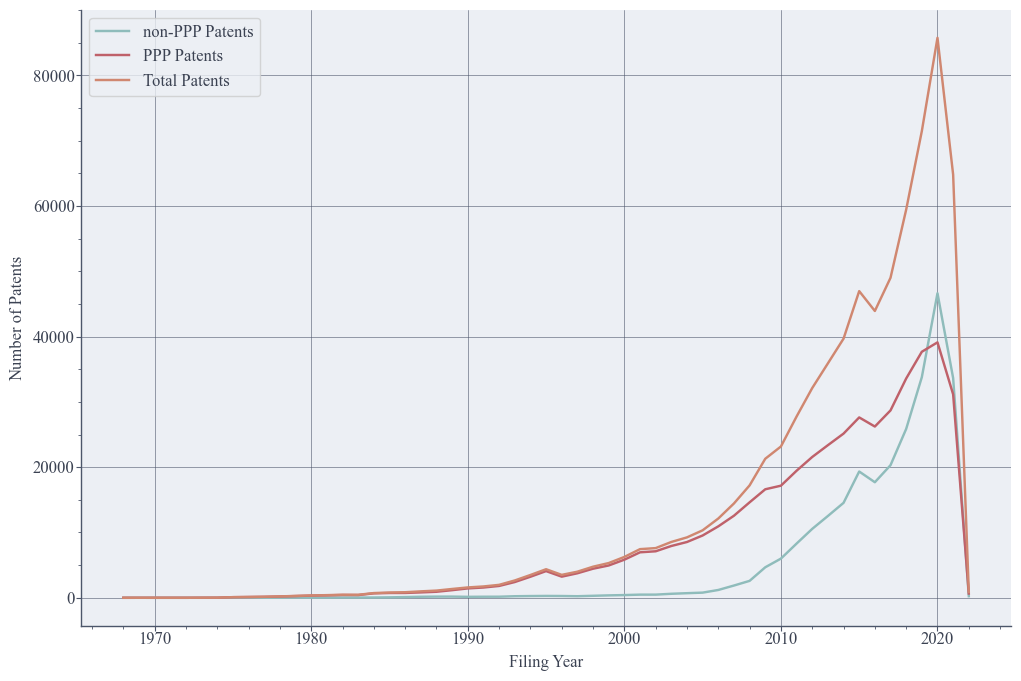

In [35]:
#调用aquarel
theme.apply()
# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
# font_path = '/data/wangyuhang/ttf/ARIAL.TTF'

font = FontProperties(fname=font_path, size=12)
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_filing_year', 'PPP']).size().unstack(fill_value=0)
# grouped_data = grouped_data[grouped_data.index.isin(range(1980,2021))]
# 计算每年总专利数量和核心专利数量
total_patents_per_year = grouped_data.sum(axis=1)
core_patents_per_year = grouped_data[1]  # 假设 1 表示核心专利

# 绘制折线图和柱状图合一的图
plt.figure(figsize=(12, 8))

# 柱状图
plt.plot(grouped_data.index, grouped_data[0], marker='', label='non-PPP Patents')
plt.plot(grouped_data.index, grouped_data[1], marker='', label='PPP Patents')
plt.plot(grouped_data.index, grouped_data.sum(axis=1), marker='', label='Total Patents')

# 设置图表标题和标签
# plt.title('Total Patents Over Years')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

# 显示图例
plt.legend(prop=font)

# plt.savefig('version_4_result/patent_over_year.png', format='png', bbox_inches='tight')
# plt.savefig('version_4_result/patent_over_yea.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

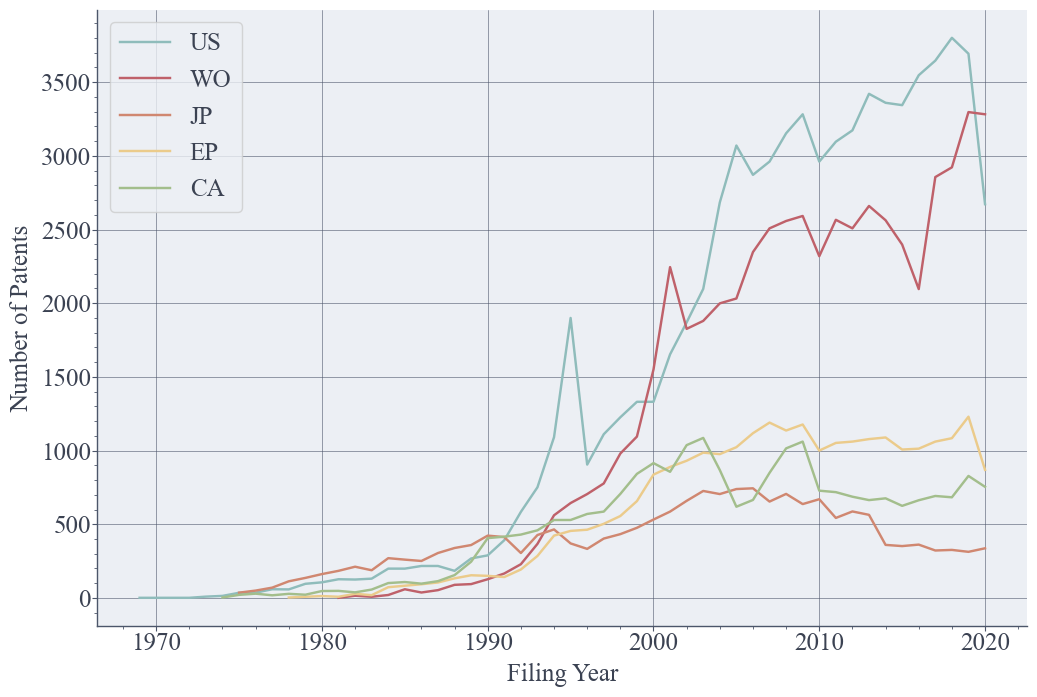

In [47]:
#调用aquarel
theme.apply()
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=18)
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_auth', 'appln_filing_year', 'PPP']).size().unstack(fill_value=0).reset_index()
# grouped_data = grouped_data[grouped_data['appln_filing_year'].isin(range(1980,2021))]

# 计算每年各国总专利数量
total_patents_per_year = grouped_data.groupby(['appln_auth','appln_filing_year']).sum()

# 绘制折线图
plt.figure(figsize=(12, 8))

# 遍历每个国家，绘制折线图
for country in ['US','WO','JP','EP', 'CA']:
    country_data = grouped_data[(grouped_data['appln_auth'] == country)&(grouped_data['appln_filing_year'] <2021)]
    plt.plot(country_data['appln_filing_year'], country_data[1], marker='', label=country)

# 设置图表标题和标签
# plt.title('PPP Patents Over Years by Country')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

# 显示图例
plt.legend(prop=font)
# plt.savefig('version_4_result/PPP Patents Over Years by Country.png', format='png', bbox_inches='tight')
# plt.savefig('version_4_result/PPP Patents Over Years by Country.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

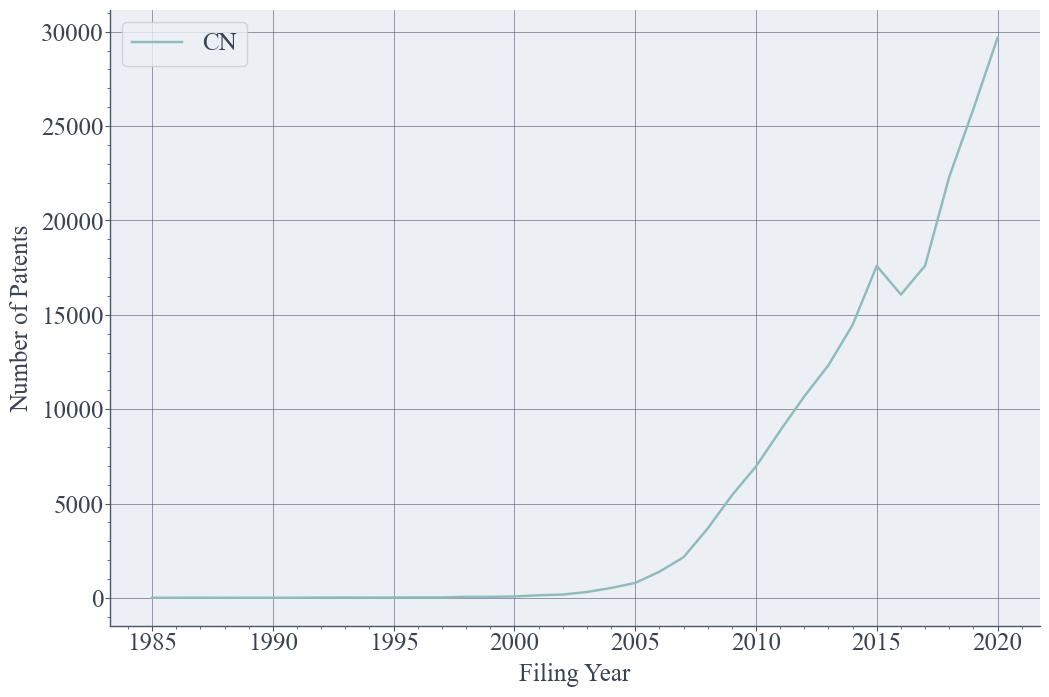

In [49]:
#调用aquarel
theme.apply()
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=18)
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_auth', 'appln_filing_year', 'PPP']).size().unstack(fill_value=0).reset_index()
# grouped_data = grouped_data[grouped_data['appln_filing_year'].isin(range(1980,2021))]

# 计算每年各国总专利数量
total_patents_per_year = grouped_data.groupby(['appln_auth','appln_filing_year']).sum()

# 绘制折线图
plt.figure(figsize=(12, 8))

# 遍历每个国家，绘制折线图
for country in ['CN']:
    country_data = grouped_data[(grouped_data['appln_auth'] == country)&(grouped_data['appln_filing_year'] <2021)]
    plt.plot(country_data['appln_filing_year'], country_data[1], marker='', label=country)

# 设置图表标题和标签
# plt.title('PPP Patents Over Years by Country')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

# 显示图例
plt.legend(prop=font)
# plt.savefig('version_4_result/PPP Patents Over Years by Country.png', format='png', bbox_inches='tight')
# plt.savefig('version_4_result/PPP Patents Over Years by Country.jpg', format='jpg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

# Time Lag

In [50]:
df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']
df_ppp['time_lag']=df_ppp['time_lag'].apply(lambda x:x.days/365)

/tmp/ipykernel_234960/2594595657.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']


In [51]:
df_time_lag=df_ppp.sort_values(['eid','time_lag'])[['author_id', 'person_id','eid','appln_id','coverDate','appln_filing_date','time_lag']]
df_time_lag=df_time_lag.drop_duplicates(['appln_id', 'person_id'],keep='first')
df_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
3376565,7102709932,7632822,2-s2.0-0000000842,49727020,1999-01-01,1989-04-14 00:00:00,9.723288
3376586,7102709932,16197826,2-s2.0-0000000842,4285768,1999-01-01,1988-04-20 00:00:00,10.706849
14691721,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
6286876,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
10412173,7006102710,37002324,2-s2.0-0000001398,45686315,1998-01-01,2003-01-03 00:00:00,-5.008219
...,...,...,...,...,...,...,...
3726455,7102103132,19630091,2-s2.0-9144245598,38222534,2004-01-01,2003-09-05 00:00:00,0.323288
14597493,7003613740,30811534,2-s2.0-9144253978,439492632,2004-01-16,2013-07-23 00:00:00,-9.523288
9211774,36559753100,5757939,2-s2.0-9444267155,47252369,2004-12-24,1994-11-18 00:00:00,10.106849
7846718,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342


In [52]:
# 先有专利，后有的论文，所以time_lag是正的，选择绝对值最小的，因此是first
df_patent_time_lag=df_time_lag[df_time_lag['time_lag']>0].drop_duplicates(['person_id','appln_id'],keep='first')
df_patent_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
3376565,7102709932,7632822,2-s2.0-0000000842,49727020,1999-01-01,1989-04-14 00:00:00,9.723288
3376586,7102709932,16197826,2-s2.0-0000000842,4285768,1999-01-01,1988-04-20 00:00:00,10.706849
10411966,7006102710,5285887,2-s2.0-0000001398,54106902,1998-01-01,1997-08-13 00:00:00,0.386301
10411763,7006102710,5285887,2-s2.0-0000001398,53559340,1998-01-01,1997-02-26 00:00:00,0.846575
915009,7006102710,5285887,2-s2.0-0000001398,50537007,1998-01-01,1995-02-23 00:00:00,2.857534
...,...,...,...,...,...,...,...
1855251,8063538100,10404670,2-s2.0-9044242093,4483365,1996-01-01,1994-12-09 00:00:00,1.063014
3726454,7102103132,19630091,2-s2.0-9144245598,38222522,2004-01-01,2003-09-05 00:00:00,0.323288
3726455,7102103132,19630091,2-s2.0-9144245598,38222534,2004-01-01,2003-09-05 00:00:00,0.323288
9211774,36559753100,5757939,2-s2.0-9444267155,47252369,2004-12-24,1994-11-18 00:00:00,10.106849


In [53]:
# 先有论文，后有的专利，所以time_lag是负的，选择绝对值最小的，因此是last
df_paper_time_lag=df_time_lag[df_time_lag['time_lag']<0].drop_duplicates(['person_id','eid'],keep='last')
df_paper_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
14691721,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
6286876,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
10412378,7006102710,37002324,2-s2.0-0000001398,47384058,1998-01-01,1998-02-26 00:00:00,-0.153425
10412787,7006102710,3751702,2-s2.0-0000001398,17336896,1998-01-01,1998-02-26 00:00:00,-0.153425
8075877,36051435500,17355714,2-s2.0-0000002132,47360706,1991-07-01,1997-10-10 00:00:00,-6.282192
...,...,...,...,...,...,...,...
3726453,7102103132,19630091,2-s2.0-9144245598,7919059,2004-01-01,2004-09-03 00:00:00,-0.673973
3726458,7102103132,25270824,2-s2.0-9144245598,40726612,2004-01-01,2004-09-03 00:00:00,-0.673973
3726451,7102103132,713871,2-s2.0-9144245598,16102761,2004-01-01,2004-08-31 00:00:00,-0.665753
14597493,7003613740,30811534,2-s2.0-9144253978,439492632,2004-01-16,2013-07-23 00:00:00,-9.523288


In [54]:
df_paper_time_lag=df_paper_time_lag.merge(df_ppp[['appln_id','appln_auth']],how='left',left_on='appln_id',right_on='appln_id')

In [55]:
five_big=['WO','EP','JP','KOR','CN','US']
df_paper_time_lag.loc[~df_paper_time_lag['appln_auth'].isin(five_big),'appln_auth']='Other'

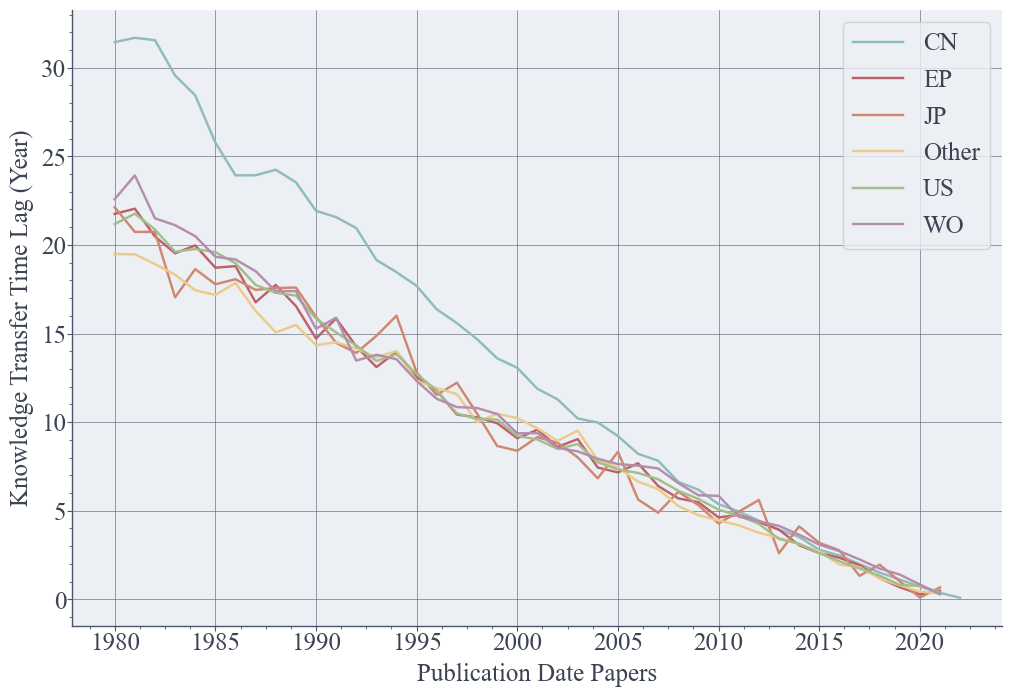

In [58]:
#调用aquarel
theme.apply()
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=18)
# Grouping and aggregating data
df_plot = df_paper_time_lag.groupby([
    pd.Grouper(key='coverDate', freq='Y', label='left'),
    'appln_auth'
]).agg(time_lag_mean=('time_lag', 'mean')).reset_index()

# Plotting with plt and sns
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_plot, x='coverDate', y=np.abs(df_plot['time_lag_mean']), hue='appln_auth')

# Set plot labels and title
plt.xlabel('Publication Date Papers', fontproperties=font)
plt.ylabel('Knowledge Transfer Time Lag (Year)', fontproperties=font)
# plt.title('Per Nation Time Lag', fontproperties=font)
plt.xticks(fontproperties = font)
plt.yticks(fontproperties = font)

plt.legend(prop=font)

# Save the figure
plt.savefig('version_4_result/per_nation_time_lag.png', format='png', bbox_inches='tight')
plt.savefig('version_4_result/per_nation_time_lag.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# 卡方检验

In [40]:
df_patent.columns

Index(['person_id', 'psn_name', 'person_address', 'appln_id', 'appln_auth',
       'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year',
       'appln_nr_original', 'ipr_type', 'receiving_office',
       'internat_appln_id', 'int_phase', 'reg_phase', 'nat_phase',
       'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id',
       'earliest_publn_date', 'earliest_publn_year', 'earliest_pat_publn_id',
       'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size',
       'nb_citing_docdb_fam', 'nb_applicants', 'nb_inventors',
       'cited_appln_id', 'citation_count_5year', 'PPP'],
      dtype='object')

In [41]:
df_patent_K=df_patent[df_patent['appln_filing_year']<=2017]
df_paper_K=df_paper[df_paper['coverDate_year']<=2017]


In [42]:
print('科学转换的专利五年内平均被引',df_patent_K[(df_patent_K['PPP']==1)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].mean())
print('非科学转换的专利五年内平均被引',df_patent_K[(df_patent_K['PPP']==0)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].mean())

print('科学转换的论文平均被引',df_paper_K[(df_paper_K['PPP']==1)&(df_paper_K['eid'].notnull())]['citedby_count'].mean())
print('非科学转换的论文平均被引',df_paper_K[(df_paper_K['PPP']==0)&(df_paper_K['eid'].notnull())]['citedby_count'].mean())

科学转换的专利五年内平均被引 3.5362189091086265
非科学转换的专利五年内平均被引 1.5269379691821414
科学转换的论文平均被引 67.5253426861868
非科学转换的论文平均被引 42.404000407331374


In [43]:
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_patent_K[(df_patent_K['PPP']==1)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].to_numpy(), 
                              df_patent_K[(df_patent_K['PPP']==0)&(df_patent_K['appln_id'].notnull())]['citation_count_5year'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

Wilcoxon rank-sum statistic: 54.69507326357498
P-value: 0.0


In [44]:
# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_paper_K[(df_paper['PPP']==1)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy(), 
                              df_paper_K[(df_paper['PPP']==0)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

/tmp/ipykernel_35634/925221174.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  statistic, p_value = ranksums(df_paper_K[(df_paper['PPP']==1)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy(),
/tmp/ipykernel_35634/925221174.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_paper_K[(df_paper['PPP']==0)&(df_paper_K['eid'].notnull())]['citedby_count'].to_numpy())


Wilcoxon rank-sum statistic: 261.73073640554264
P-value: 0.0


In [45]:
from linearmodels.panel import PanelOLS#
mod = PanelOLS.from_formula("citation_count_5year ~ PPP+docdb_family_size+nb_citing_docdb_fam+nb_applicants+nb_inventors+EntityEffects",
                            data=df_patent_K.set_index(['person_id',"appln_filing_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,0.4872,0.0257,18.929,0.0000,0.4368,0.5377
docdb_family_size,-0.0438,0.0097,-4.5129,0.0000,-0.0628,-0.0248
nb_citing_docdb_fam,0.0785,0.0075,10.433,0.0000,0.0638,0.0933
nb_applicants,0.7373,0.0293,25.153,0.0000,0.6798,0.7947
nb_inventors,-0.0026,0.0061,-0.4314,0.6662,-0.0147,0.0094


In [46]:
df_scopus.columns

Index(['eid', 'doi', 'title', 'coverDate', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'citedby_count',
       'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor'],
      dtype='object')

In [47]:
df_paper_K['author_count']=df_paper_K['author_count'].astype(float)
df_paper_K['openaccess']=df_paper_K['openaccess'].astype(float)
# df_paper['afid']=df_paper['afid'].astype(int).astype(str)
# df_paper_K


/tmp/ipykernel_35634/908603321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_K['author_count']=df_paper_K['author_count'].astype(float)
/tmp/ipykernel_35634/908603321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paper_K['openaccess']=df_paper_K['openaccess'].astype(float)


In [48]:
from linearmodels.panel import PanelOLS
mod = PanelOLS.from_formula("citedby_count ~ PPP+author_count+openaccess+EntityEffects",
                            data=df_paper_K.set_index(['author_id',"coverDate_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,18.021,0.3609,49.937,0.0000,17.314,18.729
author_count,3.3719,0.0748,45.099,0.0000,3.2253,3.5184
openaccess,8.0908,0.3456,23.411,0.0000,7.4134,8.7681
